![example](images/streaming_platforms_entertainment.png)

# Microsoft Film Industry and Streaming Platform Analysis 

**Authors:** CeCe Lacey, Qiwen Ou, Mallory Wilson
***

## Overview

When we were first faced with the question of whether or not Microsoft should pursue a path towards movie producing, we quickly knew we were going to reccomend that Microsoft consider creating a streaming platform as opposed to a movie studio. In the last 10 years movie theaters have seen a decrease in attendance while streaming platforms have seen an increase in subscriptions. With the COVID-19 Pandemic also turning the world on its head in early 2020 we have had a dramatic shift in how we spend our time and how we consume media. This new consumption is heavily focused on streaming platforms. We looked at box office data as well as streaming platform data to discover that this trend would indeed allow us to confidently reccomend that Microsoft forego their plans to build a movie studio and instead to create a streaming platform to share a variety of content with their subscribers. 

## Business Problem

Microsoft is curious to know how they should go about creating a movie studio to break into the film industry. Before making our reccomendations we decided to answer a few key questions:
- What have box office trends looked like over the last decade?
- What trends can we see in streaming platform subscriptions and revenues over the last decaede?
- What type of content exists on successful streaming platforms?
In answering these questions we will determine whether movie producing is the best route for Microsoft to pursue or if a streaming platform may be a better option.

## Data Understanding
We utilized a combination of data from the supplied data as well as a few data sets from Kaggle and google dataset search. We wanted to get a high level view of movies that were successful at the box office as well as recent movie going trends. Additionally, we sought out streaming platform data. We wanted to see what streaming platform subscriptions, revenues, and available content looked like. This overview would give us insight into the potential upside of recommending Microsoft invest in a streaming platform as opposed to a movie studio. We hoped to see that movies that are successful at the box office end up being able to be viewed on streaming platforms as well as that streaming platform subscriptions are increasing. This would give us significant data to suggest Microsoft's most lucrative entry into the film industry would be to build a subscription based streaming platform. 

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.make_db import create_movies_db
import sqlite3 
conn = sqlite3.connect('data/movies.db')
# Initialize a cursor
cursor = conn.cursor()
%matplotlib inline

In [2]:
#Load data and see a preview
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') 
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#Change values to float to be able to order by value
budgets['domestic_gross'] = budgets['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float) 
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
budgets['production_budget'] = budgets['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [4]:
#Create a column to aggregate domestic and global gross profits and sort by that value
budgets['end_gross'] = budgets['domestic_gross'] + budgets['worldwide_gross'] - budgets['production_budget'] 
budgets = budgets.sort_values(by='end_gross', ascending=False)

### It is important to note the data we are importing below only has data for Netflix, Hulu, Prime Video, and Disney+. These do not represent the streaming industry as a whole, but do represent a significant portion. We recognize there are also nuances between these platforms including but not limited to the newness of Disney+ as well as the ability to purchase content not included in your subscription on Prime Video.

In [5]:
#Import streaming platform data from Kaggle source
stream_platform = pd.read_csv('data/MoviesOnStreamingPlatforms_updated.csv')
#Remove rows that do not have Rotten Tomatoes rating data to ensure 
#we have some measure of movie success within this new dataframe.
stream_platform = stream_platform.dropna(subset = ['Rotten Tomatoes'])
#Create series of movie titles found in the streaming platform data
stream_title = stream_platform['Title']
#Create a series of movie titles found in our original data to be 
#able to cross reference with our new data
data_title = budgets['movie']

In [6]:
#Createa a dataframe that inclueds all of the movies that are in our original movie data 
#as well as the new streaming data
streammoviedata = stream_platform[stream_platform['Title'].isin(data_title)]
#Create series of just the titles from the above data
streammovie_titles = streammoviedata['Title']
#Find all of the movies that are in our original movie data, but NOT in our
#new streaming data and see description
(stream_platform[~stream_platform['Title'].isin(data_title)]).describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,4170.000000,4170.000000,4170.000000,4168.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.0,4134.000000
mean,5182.040528,5183.040528,2006.755156,6.334597,0.254916,0.116787,0.627338,0.047722,0.0,98.558539
std,3655.057345,3655.057345,17.584535,1.008960,0.435866,0.321204,0.483571,0.213203,0.0,21.560719
min,4.000000,5.000000,1902.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000
25%,2607.750000,2608.750000,2005.250000,5.700000,0.000000,0.000000,0.000000,0.000000,0.0,88.000000
50%,5141.500000,5142.500000,2014.000000,6.400000,0.000000,0.000000,1.000000,0.000000,0.0,96.000000
75%,6499.750000,6500.750000,2017.000000,7.100000,1.000000,0.000000,1.000000,0.000000,0.0,107.750000
max,16687.000000,16688.000000,2020.000000,8.800000,1.000000,1.000000,1.000000,1.000000,0.0,270.000000


In [7]:
#Create a data frame showing all the movies that are found in our new streaming data
#as well as in the given movie data
budgets[budgets['movie'].isin(streammovie_titles)]
#Find all of the movies that are in our new streaming data, but that are not found in 
#our original movie data
budgets[~budgets['movie'].isin(streammovie_titles)]
#Get rid of rows that show no data for both domestic_gross and world_wide gross (just one
#value could indicate either a solely domestic release or solely global release)
df = budgets.loc[(budgets['domestic_gross'] > 0.0) & (budgets['worldwide_gross'] > 0.0)]
df
#Filter to find total (end) gross for all movies not found on streaming platforms 
nonstream_eg=df[~df['movie'].isin(streammovie_titles)]
#Find average final gross for movies not found on streaming platforms
nonstream_eg.describe()

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,4291.000000,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03
mean,50.186204,3.243548e+07,4.344763e+07,9.425513e+07,1.052673e+08
std,28.836660,4.005439e+07,6.501099e+07,1.661247e+08,2.017095e+08
min,1.000000,1.100000e+03,4.010000e+02,4.010000e+02,-1.574753e+08
25%,25.000000,6.000000e+06,4.000000e+06,7.833752e+06,1.243676e+06
50%,50.000000,1.940000e+07,2.096664e+07,3.346201e+07,3.250004e+07
75%,75.000000,4.100000e+07,5.507109e+07,1.044966e+08,1.200958e+08
max,100.000000,3.500000e+08,9.366622e+08,2.208208e+09,2.683973e+09


In [8]:
df_title = df['movie']
#Total gross profit of all the movies found on at least one of the streaming platforms
onstream_eg=df[df['movie'].isin(streammovie_titles)] 
#Average tota gross of these movies
onstream_eg.describe()

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,943.000000,9.430000e+02,9.430000e+02,9.430000e+02,9.430000e+02
mean,51.076352,4.130498e+07,5.904326e+07,1.303679e+08,1.481062e+08
std,28.907321,5.368128e+07,8.946631e+07,2.355588e+08,2.803931e+08
min,1.000000,3.000000e+04,3.880000e+02,7.030000e+02,-8.905748e+07
25%,26.000000,7.150000e+06,5.978240e+06,1.074536e+07,5.436333e+06
50%,51.000000,2.000000e+07,2.808716e+07,4.715865e+07,4.744992e+07
75%,76.500000,5.000000e+07,7.216403e+07,1.408390e+08,1.627550e+08
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,3.111853e+09


In [9]:

df_nonstream = stream_platform[~stream_platform['Title'].isin(df_title)] #CECE's data on movies NOT on stream
df_stream = stream_platform[stream_platform['Title'].isin(df_title)] #CECE's data on movies on stream
dfbudgetfilter = df[df['movie'].isin(df_stream['Title'])] #filter two lists together

In [10]:
dfbudgetfilter['Year'] = pd.DatetimeIndex(dfbudgetfilter['release_date']).year #make Year column to join


<ipython-input-10-8e5a546ea521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbudgetfilter['Year'] = pd.DatetimeIndex(dfbudgetfilter['release_date']).year #make Year column to join


In [11]:
#Create variable showing???
eg_value = [148.1062, 105.2673]

## Data Preparation

After acquiring a handful of additional data sources, we began our Exploratory Data Analysis and cleaning. Dropped variables mostly included null values to ensure accuracy across our data. We take a look here at how we began to initially look at and clean up our data.


In [12]:
df_stream = df_stream.rename(columns={"Title": "movie"}) #change 'title' to 'movie' to join
last_data = df_stream.merge(dfbudgetfilter, on=['movie', 'Year']) 
#joing/merging two data together with the same title and name

In [13]:
#See how many movies in our combined data are available on Netflix
last_data['Netflix'].value_counts() #1 = yes it is on

0    452
1    303
Name: Netflix, dtype: int64

In [14]:
#See how many movies in our combined data are available on Hulu
last_data['Hulu'].value_counts()

0    633
1    122
Name: Hulu, dtype: int64

In [15]:
#See how many movies in our combined data are available on Prime Video
last_data['Prime Video'].value_counts()

0    456
1    299
Name: Prime Video, dtype: int64

In [16]:
#See how many movies in our combined data are available on Disney+
last_data['Disney+'].value_counts()

0    621
1    134
Name: Disney+, dtype: int64

In [17]:
#Manually create variables with the amount of movies on each platform as well as 
#the names of the platforms to build a visualization
numofmovie = [303, 122, 299, 134]
nameofplatform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [18]:
#Import data set acquired from Kaggle with information about TV Shows on streaming platforms
tvshows = pd.read_csv('data/tv_shows.csv')
tvshows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [19]:
tvshows = tvshows.dropna(subset = ['Rotten Tomatoes'])

In [20]:
#See how many TV Shows in data are available on Netflix
tvshows['Netflix'].value_counts()

0    557
1    454
Name: Netflix, dtype: int64

In [21]:
#See how many TV Shows in data are available on Hulu
tvshows['Hulu'].value_counts()

0    636
1    375
Name: Hulu, dtype: int64

In [22]:
#See how many TV Shows in data are available on Prime Video
tvshows['Prime Video'].value_counts()

0    783
1    228
Name: Prime Video, dtype: int64

In [23]:
#See how many TV Shows in data are available on Disney+
tvshows['Disney+'].value_counts()

0    987
1     24
Name: Disney+, dtype: int64

In [24]:
#Import and clean up movie going data found from Kaggle 
df2 = pd.read_csv('data/data_mallory/project_data.csv')
#Drop all null values
df2 = df2.dropna()
#Drop columns to focus on Year and Tickets Sold
df2 = df2.drop(['Total Box Office', 'Total Inflation', 'Average',], axis = 1)
#Replace commas in tickets sold numbers to be able to change to integer 
df2['Tickets Sold'] = df2['Tickets Sold'].str.replace(',','').astype(int)
#Change year column type also to integer for visualization purposes
df2['Year'] = df2['Year'].astype(int)
#Put the data in chronological order by year
df2 = df2.sort_values(['Year'], ascending=True)
#Show the cleaned data
df2

,Year,Tickets Sold
26,1996,1305216770
25,1997,1385218935
24,1998,1443827003
23,1999,1444664086
22,2000,1397460079
21,2001,1465874205
20,2002,1575756527
19,2003,1524585021
18,2004,1495651298
17,2005,1372980280


In [25]:
#Import aggregated streaming platform revenue data from external source
df3 = pd.read_csv('data/data_mallory/streaming_revenue.csv')
#Drop columns to focus on Year and Suscription Revenue in Billions
df3 = df3.drop(['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1)
#Drop null values
df3 = df3.dropna()
#Rename columns
df3_renamed = df3.rename(columns={"Unnamed: 1": "Year", "Unnamed: 2": "Subscription Revenue in Billions"})
df3_renamed = df3_renamed.drop([0])
df3_renamed = df3_renamed.sort_values(['Year'], ascending=True)
df3_renamed

,Year,Subscription Revenue in Billions
10,2011,2.4
9,2012,2.79
8,2013,4.6
7,2014,5.53
6,2015,6.41
5,2016,7.36
4,2017,8.17
3,2018,8.95
2,2019,9.74
1,2020,10.36


In [26]:
#Import data on number of subscribers
df4 = pd.read_csv('data/data_mallory/streaming_subscription_data.csv')
#Clean up table
df4 = df4.drop(['Table 1'], axis=1)
df4 = df4.reset_index()
df4 = df4.drop(['level_0'], axis=1)
df4.columns = list(df4.iloc[0])
df4 = df4.drop([0])
#Drop null values 
df4 = df4.dropna()
df4 = df4.astype(float)
df4

,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013.0,31.71,43.0,4.0
2,2014.0,37.70,46.0,6.0
3,2015.0,43.40,49.0,10.0
4,2016.0,47.91,49.0,12.0
5,2017.0,52.81,54.0,17.0
6,2018.0,58.49,50.0,25.0
7,2019.0,61.04,43.0,28.5
8,2020.0,73.94,41.0,36.6
9,2021.0,74.38,44.2,41.6


## Data Modeling
We sought to create 5 visualizations which you will see below. After we cleaned our data, we utlizied MatPlotLib for our figures, and adjusted a few aspects within each model for ease of viewing. We used a combination of bar graphs and line graphs to show difference across different items as well as changes over time. 


### Figure 1 
This figure shows movie tickets sold annually in the United States since 1996, showing a decline in the sale of movie tickets since the past years.

Text(0, 0.5, 'Tickets Sold (in millions)')

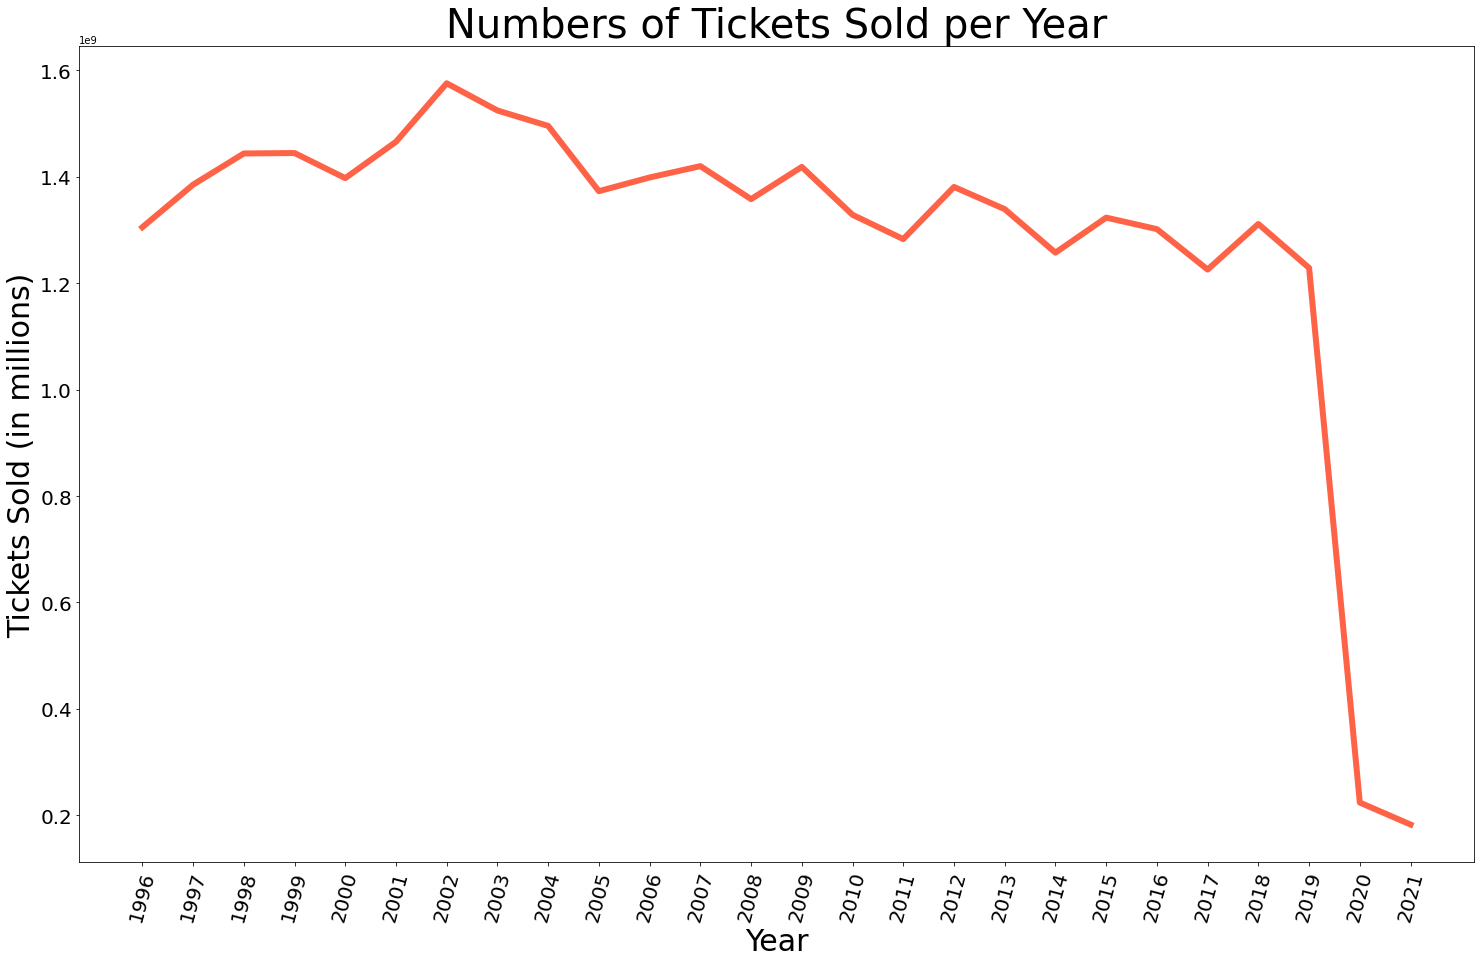

In [27]:
#Create a line graph showing the decrease in Movie ticket sales since 1996

x = df2['Year'].astype(str)
y = df2['Tickets Sold'].values

plot_two_fig, plot_two_ax = plt.subplots(figsize=(25,15))
plot_two_ax.plot(x, y, linewidth=6, color = "tomato")

plot_two_ax.tick_params(axis='x', labelsize=20, rotation = 75)
plot_two_ax.tick_params(axis='y', labelsize=20)
plot_two_ax.set_title('Numbers of Tickets Sold per Year', fontsize=40)
plot_two_ax.set_xlabel('Year', fontsize=30)
plot_two_ax.set_ylabel('Tickets Sold (in millions)', fontsize=30)

### Figure 2
This figure shows the average gross box office profit for movies in our data that our now found on streaming platforms compared to the average gross box office profit for movies in our data not currently found on streaming platforms.


<BarContainer object of 2 artists>

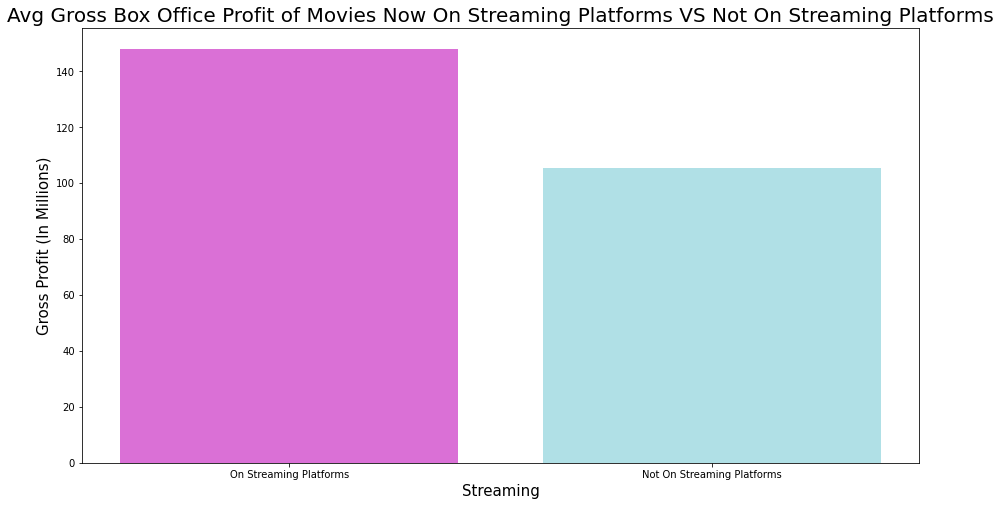

In [28]:
eg_value = [148.1062, 105.2673]
eg_x = ['On Streaming Platforms', 'Not On Streaming Platforms']
#Create a bar chart showing the average box office profit for movies found on streaming platforms
#and movies not found on streaming platforms in our data
x = eg_x
y = eg_value
plot_one_fig, plot_one_ax = plt.subplots(figsize = (15, 8))

plot_one_ax.bar(x,y)
plot_one_ax.set_title('Avg Gross Box Office Profit of Movies Now On Streaming Platforms VS Not On Streaming Platforms', fontsize=20)
plot_one_ax.set_xlabel('Streaming', fontsize=15)
plot_one_ax.set_ylabel('Gross Profit (In Millions)', fontsize=15)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, color=['orchid', 'powderblue'])

### Figure 3
This figure shows total streaming platform subscription revenue from 2011 to 2020.

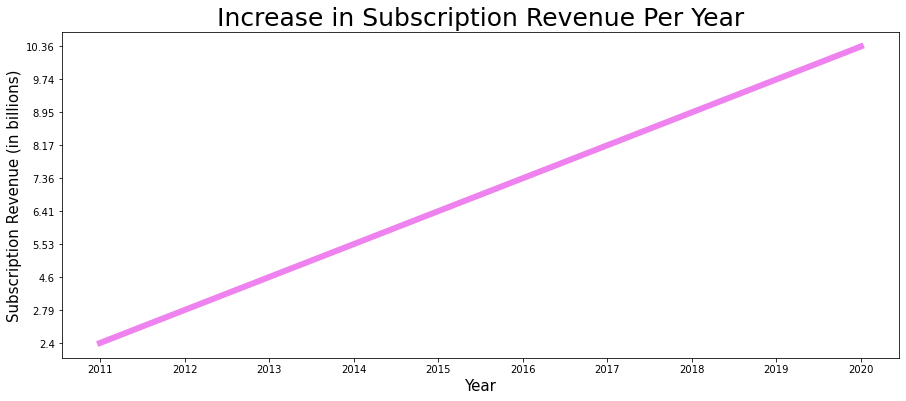

In [29]:
#Create line graph to show increase in subscription revenue since 2011
import matplotlib.pyplot as plt
import numpy as np
  
fig, ax = plt.subplots(figsize=(15,6))  
x = df3_renamed['Year'] 
y = df3_renamed['Subscription Revenue in Billions']
  
plt.plot(x, y, linewidth=6, color = "violet")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Subscription Revenue (in billions)", fontsize=15)
plt.title("Increase in Subscription Revenue Per Year", fontsize=25)
plt.show()  

### Figure 4 
It is important to note this data does not look at all four streaming platforms we have in our previous data and includes an additional platform also, HBO. We decided to continue with this data because we could not find clear subscription data for Prime Video and Dinsey+. We believe this is for two reasons, Prime Video comes with an Amazon Prime subscription and most people do not subscribe to Amazon Prime solely for the streaming acccessibility. Additionaly, many titles on Prime Video are not even included with the subscription. Disney+ is less than 2 years old and does not have enough data to show. We felt comfortable showing HBO in this visualization because it represents a different type of popular subscription service that has now turned into a streaming platform.

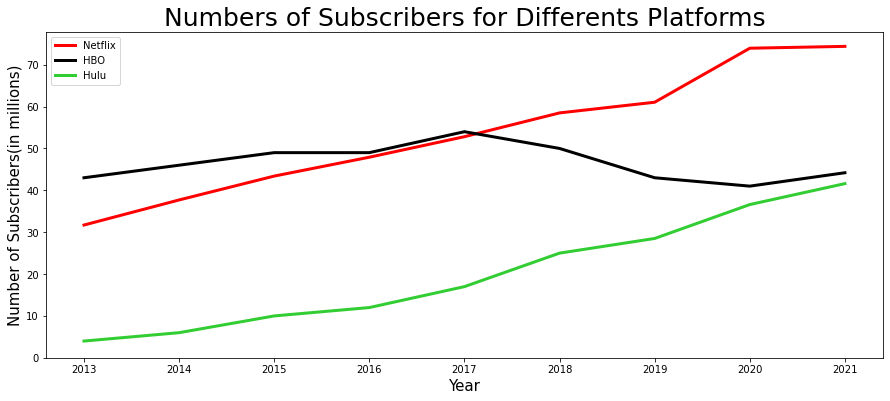

In [30]:
#Create a line graph showing the growth in subscribers across 3 different platforms: Netflix, HBO, and Hulu
fig, ax = plt.subplots(figsize=(15,6))
x1 = df4['Year']
y1 = df4['Number of Netflix Subscribers']
plt.plot(x1, y1, label = "Netflix", color = 'red', linewidth=3)
x2 = df4['Year']
y2 = df4['Number of HBO Subscribers']
plt.plot(x2, y2, label = "HBO", color = 'black', linewidth=3)
x3 = df4['Year']
y3 = df4['Number of Hulu Subscribers']
plt.plot(x3, y3, label = "Hulu", color = 'limegreen', linewidth=3) 


plt.legend()

plt.xlabel("Year", fontsize=15)
plt.yticks(np.arange(0, 80, 10)) 
plt.ylabel("Number of Subscribers(in millions)", fontsize=15)
plt.title("Numbers of Subscribers for Differents Platforms", fontsize=25)
  

plt.show() 

### Figure 5
This figure shows the number of movies and tv shows from are data available across Netflix, Hulu, Prime Video, and Dinsey+. 

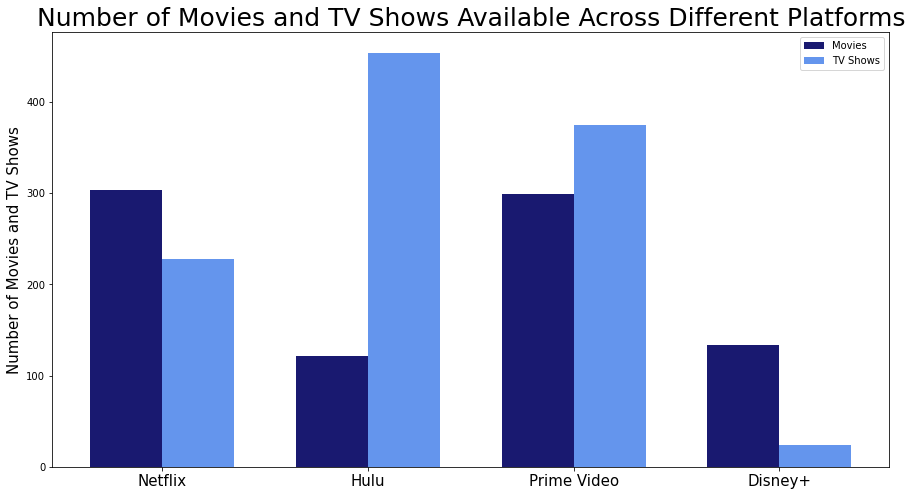

In [31]:
#Manually create variable for visualitation - numbers of movies and tv shows found across the 4 platforms
#for the y axis and platform names for the x axis
numofmovie = [303, 122, 299, 134]
tvshowcount = [228, 454, 375, 24]
nameofplatform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

#Create a bar graph showing variety of how many films and TV shows in our data appear on Netflix, 
#Hulu, Prime Video, and Disney+
labels = nameofplatform
movies = numofmovie
tvshows = tvshowcount

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(x - width/2, movies, width, label='Movies', color= 'midnightblue')
ax.bar(x + width/2, tvshows, width, label='TV Shows', color= 'cornflowerblue')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Movies and TV Shows', fontsize=15)
ax.set_title('Number of Movies and TV Shows Available Across Different Platforms',fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.legend()


plt.show()

## Evaluation
The clearest indicators in our data for Microsoft to pursue a streaming platform instead of a movie studio are movie ticket sale trends and streaming platform subscription trends. There are many other more in depth factors we could consider in making this analysis, but considering our time constraints and access to data we chose to go with this high level approach. While our results do represent a large snapshot of the industries, I believe that if we took a deeper, more detailed look we would indeed still come up with the same overall reccomendations. 

However, with the measures we do have, we feel confident in our reccomendations. 
 1. Movie ticket sales have gone down since 2011
 2. Streaming platforms have increased since 2013.
 3. Streaming platform revenue has also steadily increased.
 4. Movies that have success in the box office end up on streaming services.
 5. Successful streaming platforms offer a variety of TV Shows and movies.|


## Conclusions
If able to take this further a few things we could look at would be the necessary components (people, knowledge, skill sets, etc.) needed to make a successful movie studio and a successful streaming platform compared to the immense supply of talent microsoft already has in house. We could look deeper into pre-existing relationships Microsoft has for easy partnerships for the platform and/or for content to be hosted on the platform. These would for sure be prudent next steps for Microsoft to take in pursuing building a streaming platform. Our analysis focuses on the domestic sector but would benefit from a global perspective considering Microsofts global reach. We would take all of these factors into consideration in order to improve this project in the future.